<a href="https://colab.research.google.com/github/cow-coding/Competition/blob/main/Dacon/Dacon_17_news_topic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy
!pip install soynlp

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import konlpy
import soynlp
import re
from soynlp.word import WordExtractor
from konlpy.tag import Mecab, Okt
import warnings

In [ ]:
path = '/content/drive/MyDrive/news/'

train = pd.read_csv(path+'train_data.csv')
test = pd.read_csv(path+'test_data.csv')
topic_dict = pd.read_csv(path+'topic_dict.csv').to_dict()['topic']

In [ ]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [ ]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [ ]:
topic_dict

{0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}

우선 클래스 불균형을 확인하고자 클래스 분포를 확인해보겠습니다.

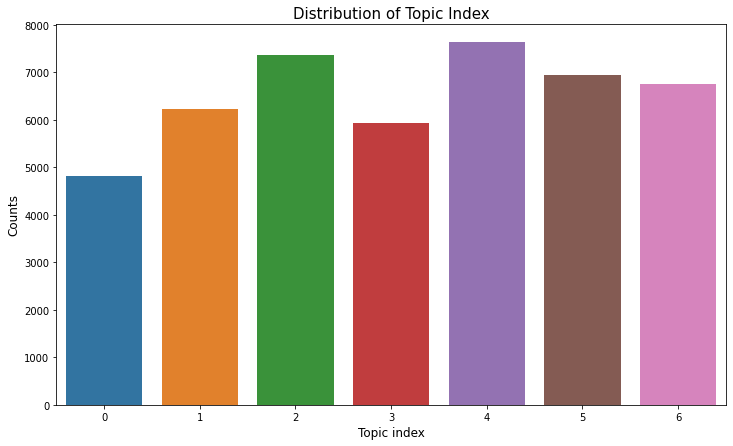

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train, x='topic_idx')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Topic index', fontsize=12)
plt.title('Distribution of Topic Index', fontsize=15)
plt.show()

클래스 별로 크게 불균형이 있는 것 같지는 않습니다.  

이번에는 각 주제별로 제목을 5개 정도씩 뽑아서 특징을 분석해보겠습니다.

In [ ]:
grouped_df = train.groupby('topic_idx')

for name, group in grouped_df:
    print(f'Topic name : {topic_dict[name]}')
    cnt = 0

    for idx, row in group.iterrows():
        print(row['title'])
        cnt += 1

        if cnt == 5:
            break

    print('\n')

Topic name : IT과학
지카바이러스도 규명한 초저온전자현미경…신약연구에 유용
증강현실 ① 알파고 이어 포켓몬 고…거센 IT 광풍
AI 월드컵 생생한 현장 중계도
이세돌 알파고 집중력 사람이 이기긴 어렵다 일문일답종합2보
올해 휴대폰 국내 생산량 2천500만대…10년전의 18.4%


Topic name : 경제
못믿을 아파트 관리비…경기 556곳서 150억 비리 적발종합
특징주 관리종목 해제 대우조선해양 강세
특징주 강원랜드 실적 부진에 급락종합
라면 수출 질주…올해 4억달러 첫 돌파 확실시
경기지표 부진 골드만삭스 한은 금리인상 예상시기 7→10월로종합


Topic name : 사회
드라마 제작환경 개선 촉구
창원세계사격대회장서 경남 시·군 관광 세계에 알린다종합
조배숙 중앙위 정례회의 주재
인천공항→송도 택시요금 12만원…바가지 택시·콜밴
조용중 전 연합뉴스 사장 별세


Topic name : 생활문화
황석영 작가 미국 문학축제서 한국문학 알린다
휴일 불청객 울산 미세먼지 주의보 발령
김수영 신임 한국출판문화산업진흥원장
신간 한반도평화 오디세이
2019 가극 금강 낭독공연 간담회


Topic name : 세계
인천→핀란드 항공기 결항…휴가철 여행객 분통
실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화
이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
시진핑 트럼프에 중미 무역협상 조속 타결 희망


Topic name : 스포츠
박찬호 현진이 10승 하니깐 생각이 나는데…
고군분투 시즌 서재덕 MVP 덕큐리로 활짝 웃다종합
임도헌 감독 신영석 중심으로 똘똘 뭉쳐 한일전 승리 따냈다
데얀·김치우 OUT 조영욱 IN…서울 과감한 재건 성과...
호날두 노쇼 유벤투스 무책임·거만 비판 수용 어려워


Topic name : 정치
김영남 우리 민족 위상 과시…뜨거운 분위기 이어가길
적극행정 추진전략 및 성과공유대회 참석한 이낙연 총리
朴대통령 한일 합의에 소녀상 언급없어…선동하면

몇가지 주제별 특징적인 것들이 보입니다. 그리고 뉴스 본문과는 다르게 제목의 특성상 명사들이 자주 등장하는 것을 볼 수 있습니다. 추가적으로 확인해봐야 할 것을 보면 특수문자를 상당히 많이 사용하는 것 같습니다. 특수문자들이 어떤 종류가 있는지 확인해봐야할 것 같습니다.  
우선 특수문자의 종류를 확인해보겠습니다.

In [ ]:
# 한글, 영어, 숫자, 한자, 띄어쓰기를 제외한 특수문자만 추출
special = train.title.apply(lambda x: set(re.findall('[^가-힣0-9a-zA-Z一-龥\u2e80-\u2eff\u31c0-\u31ef\u3200-\u32ff\u3400-\u4dbf\u4e00-\u9fbf\uf900-\ufaff\ ]', x)))
specials = []

for idx, item in special.items():
    for mark in item:
        if mark not in specials:
            specials.append(mark)

In [ ]:
specials

이번에는 주제별 일부 데이터들의 명사들만 추출해서 확인해보겠습니다.

In [ ]:
mecab = Mecab()

In [ ]:
grouped_df = train.groupby('topic_idx')

for name, group in grouped_df:
    print(f'Topic name : {topic_dict[name]}')
    cnt = 0

    for idx, row in group.iterrows():
        print(mecab.nouns(row['title']))
        cnt += 1

        if cnt == 5:
            break

    print('\n')

Topic name : IT과학
['지카', '바이러스', '규명', '초저', '전자', '현미경', '신약', '연구', '유용']
['증강현실', '알파', '포켓', '광풍']
['월드컵', '현장', '중계']
['이세돌', '알파', '집중력', '사람', '일문일답', '종합', '보']
['올해', '휴대폰', '국내', '생산량', '천', '만', '대', '년', '전']


Topic name : 경제
['아파트', '관리비', '경기', '곳', '억', '비리', '적발', '종합']
['특징', '주', '관리', '종목', '해제', '대우', '조선', '해양', '강세']
['특징', '주', '강원랜드', '실적', '부진', '급락', '종합']
['라면', '수출', '질주', '올해', '억', '달러', '돌파', '확실시']
['경기', '지표', '부진', '골드만', '삭스', '한', '금리', '인상', '예상', '시기', '월', '종합']


Topic name : 사회
['드라마', '제작', '환경', '개선', '촉구']
['창원', '세계', '사격', '대회장', '경남', '시', '군', '관광', '세계', '종합']
['조배숙', '중앙', '위', '정례회', '주재']
['인천', '공항', '송도', '택시', '요금', '만', '원', '바가지', '택시', '콜밴']
['조용중', '연합뉴스', '사장', '별세']


Topic name : 생활문화
['황석영', '작가', '미국', '문학', '축제', '한국', '문학']
['휴일', '불청객', '울산', '미세먼지', '주의보', '발령']
['김수영', '신임', '한국', '출판문화', '산업', '진흥', '원장']
['신간', '한반도', '평화', '오디세이']
['가극', '금강', '낭독', '공연', '간담회']


Topic name : 세계
['인천', '핀란드', '항공기', '결항', '휴가철', 

음... 어느정도 특징들이 보이기는 합니다. 근데 일부 문제가 발생을 한 것 같습니다.  
뉴스의 제목은 때로는 신조어를 쓰기도 한다는 것이죠.  
'스포츠' 부분의 마지막 정보를 보면 '노쇼'와 '유벤투스'를 분리해서 판단하는 것을 볼 수 있습니다.  
실제 '유벤투스'는 스포츠에 전적으로 어울리는 단어기 때문에 중요한 단어가 될 수 있습니다.  

이럴때 사용하기 좋은 것이 sonlpy입니다.

In [ ]:
word_extractor = WordExtractor()
word_extractor.train(train.title.values)
word_score = word_extractor.extract()

training was done. used memory 0.456 Gb
all cohesion probabilities was computed. # words = 27733
all branching entropies was computed # words = 40514
all accessor variety was computed # words = 40514


In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer, LTokenizer

In [ ]:
scores = {word:score.cohesion_forward for word, score in word_score.items()}

l_tokenizer = LTokenizer(scores=scores)
max_tokenizer = MaxScoreTokenizer(scores=scores)

In [ ]:
grouped_df = train.groupby('topic_idx')

for name, group in grouped_df:
    print(f'Topic name : {topic_dict[name]}')
    cnt = 0

    for idx, row in group.iterrows():
        print(l_tokenizer.tokenize(row['title']))
        cnt += 1

        if cnt == 5:
            break

    print('\n')

Topic name : IT과학
['지카바이러스', '도', '규명', '한', '초저온전자현미경…신약연구에', '유용']
['증강현실', '①', '알파고', '이어', '포켓몬', '고…거센', 'IT', '광풍']
['AI', '월드컵', '생생한', '현장', '중계도']
['이세돌', '알파고', '집중', '력', '사람이', '이기긴', '어렵다', '일문일답', '종합2보']
['올해', '휴대폰', '국내', '생산', '량', '2천500', '만대…10년전의', '18.4%']


Topic name : 경제
['못믿을', '아파트', '관리', '비…경기', '556곳서', '150억', '비리', '적발', '종합']
['특징주', '관리종목', '해제', '대우조선해양', '강세']
['특징주', '강원', '랜드', '실적', '부진에', '급락종합']
['라면', '수출', '질주', '…올해', '4억달러', '첫', '돌파', '확실시']
['경기', '지표', '부진', '골드', '만삭스', '한은', '금리인상', '예상', '시기', '7→10월로종합']


Topic name : 사회
['드라마', '제작환경', '개선', '촉구']
['창원', '세계사격대회장서', '경남', '시·군', '관광', '세계', '에', '알린다', '종합']
['조배숙', '중앙위', '정례회의', '주재']
['인천공항', '→송도', '택시', '요금', '12', '만원…바가지', '택시', '·콜밴']
['조용중', '전', '연합뉴스', '사장', '별세']


Topic name : 생활문화
['황석영', '작가', '미국', '문학', '축제서', '한국', '문학', '알린다']
['휴일', '불청객', '울산', '미세먼지', '주의보', '발령']
['김수영', '신임', '한국', '출판문화산업진흥원장']
['신간', '한반도평화', '오디세이']
['201', '9', '가극', '금강', '낭독공연', '간담회'

이제 보면 중간중간 특수문자들이 단어를 구분하는 걸 방해하는 것을 볼 수 있습니다.  

이제 특수문자들을 제거해줍시다

In [ ]:
tmp = []

for item in train.title:
    for special in specials:
        if special in item:
            item = item.replace(special, ' ')

    tmp.append(item)

train['pre'] = tmp

train.head()

,index,title,topic_idx,pre
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천 핀란드 항공기 결항 휴가철 여행객 분통
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다 구글 15조원 들여 美전역 거점화
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망


In [ ]:
tmp = []

for item in test.title:
    for special in specials:
        if special in item:
            item = item.replace(special, ' ')

    tmp.append(item)

test['pre'] = tmp

test.head()

,index,title,pre
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


특수문자를 제거하고 다시 토큰화를 해봅시다

In [ ]:
grouped_df = train.groupby('topic_idx')

for name, group in grouped_df:
    print(f'Topic name : {topic_dict[name]}')
    cnt = 0

    for idx, row in group.iterrows():
        print(l_tokenizer.tokenize(row['pre']))
        cnt += 1

        if cnt == 5:
            break

    print('\n')

Topic name : IT과학
['지카바이러스', '도', '규명', '한', '초저온전자현미경', '신약연구에', '유용']
['증강현실', '알파고', '이어', '포켓몬', '고', '거센', 'IT', '광풍']
['AI', '월드컵', '생생한', '현장', '중계도']
['이세돌', '알파고', '집중', '력', '사람이', '이기긴', '어렵다', '일문일답', '종합2보']
['올해', '휴대폰', '국내', '생산', '량', '2천500', '만대', '10', '년전의', '18', '4']


Topic name : 경제
['못믿을', '아파트', '관리', '비', '경기', '556곳서', '150억', '비리', '적발', '종합']
['특징주', '관리종목', '해제', '대우조선해양', '강세']
['특징주', '강원', '랜드', '실적', '부진에', '급락종합']
['라면', '수출', '질주', '올해', '4억달러', '첫', '돌파', '확실시']
['경기', '지표', '부진', '골드', '만삭스', '한은', '금리인상', '예상', '시기', '7', '10', '월로종합']


Topic name : 사회
['드라마', '제작환경', '개선', '촉구']
['창원', '세계사격대회장서', '경남', '시', '군', '관광', '세계', '에', '알린다', '종합']
['조배숙', '중앙위', '정례회의', '주재']
['인천공항', '송도', '택시', '요금', '12', '만원', '바가지', '택시', '콜밴']
['조용중', '전', '연합뉴스', '사장', '별세']


Topic name : 생활문화
['황석영', '작가', '미국', '문학', '축제서', '한국', '문학', '알린다']
['휴일', '불청객', '울산', '미세먼지', '주의보', '발령']
['김수영', '신임', '한국', '출판문화산업진흥원장']
['신간', '한반도평화', '오디세이']
['201', '9', '가

이제 조사와 같은 불용어를 제거하겠습니다. 한국어 불용어는 따로 데이터가 없는 걸로 압니다.  

따라서 만들어진 불용어 사전을 사용하겠습니다.

In [ ]:
train['tokenize'] = train['pre'].apply(lambda x: l_tokenizer.tokenize(x))
train.head()

,index,title,topic_idx,pre,tokenize
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천 핀란드 항공기 결항 휴가철 여행객 분통,"[인천, 핀란드, 항공, 기, 결항, 휴가철, 여행, 객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다 구글 15조원 들여 美전역 거점화,"[실리콘밸리, 넘어, 서겠다, 구글, 15, 조원, 들여, 美전역, 거점화]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,"[이란, 외무, 긴장, 완화, 해결, 책은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]"
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합,"[NYT, 클린턴, 측근, 韓기업, 특수, 관계, 조명, 공과, 사, 맞물려종합]"
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,"[시진핑, 트럼프, 에, 중미, 무역협상, 조속, 타결, 희망]"


In [ ]:
test['tokenize'] = test['pre'].apply(lambda x: l_tokenizer.tokenize(x))
test.head()

,index,title,pre,tokenize
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 2일까지 크리에이터 지원 공간 운영,"[유튜브, 내달, 2일까지, 크리, 에이터, 지원, 공간, 운영]"
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,"[어버이날, 맑다가, 흐려, 져, 남부지방, 옅은, 황사]"
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다,"[내년부터, 국가, RD, 평가, 때, 논문건수는, 반영, 않는다]"
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,"[김명자, 신임, 과총, 회장, 원로와, 젊은, 과학, 자, 지혜, 모을, 것]"
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,"[회색인간, 작가, 김동식, 양심고백, 등, 새, 소설집, 2권, 출간]"


In [ ]:
stopwords = open(path+'stop_kor.txt').read().split()
len(stopwords)

888

In [ ]:
def remove_stopwords(text):
    return [word for word in data if word not in stopwords]

In [ ]:
xtrain_clean = []

for data in train['tokenize']:
    xtrain_clean.append(remove_stopwords(data))

train['clean'] = xtrain_clean
train.head()

,index,title,topic_idx,pre,tokenize,clean
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천 핀란드 항공기 결항 휴가철 여행객 분통,"[인천, 핀란드, 항공, 기, 결항, 휴가철, 여행, 객, 분통]","[인천, 핀란드, 항공, 기, 결항, 휴가철, 여행, 객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다 구글 15조원 들여 美전역 거점화,"[실리콘밸리, 넘어, 서겠다, 구글, 15, 조원, 들여, 美전역, 거점화]","[실리콘밸리, 넘어, 서겠다, 구글, 15, 조원, 들여, 美전역, 거점화]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,"[이란, 외무, 긴장, 완화, 해결, 책은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]","[이란, 외무, 긴장, 완화, 해결, 책은, 미국, 경제, 전쟁, 멈추, 는]"
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합,"[NYT, 클린턴, 측근, 韓기업, 특수, 관계, 조명, 공과, 사, 맞물려종합]","[NYT, 클린턴, 측근, 韓기업, 특수, 관계, 조명, 공과, 맞물려종합]"
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,"[시진핑, 트럼프, 에, 중미, 무역협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역협상, 조속, 타결, 희망]"


In [ ]:
xtest_clean = []

for data in test['tokenize']:
    xtest_clean.append(remove_stopwords(data))

test['clean'] = xtest_clean
test.head()

,index,title,pre,tokenize,clean
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 2일까지 크리에이터 지원 공간 운영,"[유튜브, 내달, 2일까지, 크리, 에이터, 지원, 공간, 운영]","[유튜브, 내달, 2일까지, 크리, 에이터, 지원, 공간, 운영]"
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,"[어버이날, 맑다가, 흐려, 져, 남부지방, 옅은, 황사]","[어버이날, 맑다가, 흐려, 져, 남부지방, 옅은, 황사]"
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다,"[내년부터, 국가, RD, 평가, 때, 논문건수는, 반영, 않는다]","[내년부터, 국가, RD, 평가, 논문건수는, 반영, 않는다]"
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,"[김명자, 신임, 과총, 회장, 원로와, 젊은, 과학, 자, 지혜, 모을, 것]","[김명자, 신임, 과총, 회장, 원로와, 젊은, 과학, 지혜, 모을]"
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,"[회색인간, 작가, 김동식, 양심고백, 등, 새, 소설집, 2권, 출간]","[회색인간, 작가, 김동식, 양심고백, 새, 소설집, 2권, 출간]"


어느정도 전처리가 끝났습니다. 이제 키워드를 다시 문장으로 합치고 학습을 진행해보겠습니다.

In [ ]:
train['clean_title'] = train['clean'].apply(lambda x: ' '.join(x))
test['clean_title'] = test['clean'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train.clean_title.values, train.topic_idx, 
                                                  stratify=train.topic_idx, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [ ]:
cv = CountVectorizer()
cv.fit(train.clean_title.tolist())
train_cv = cv.transform(xtrain)
valid_cv = cv.transform(xvalid)
test_cv = cv.transform(test.clean_title.values)

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(train.clean_title.tolist())
train_tfidf = tfidf.transform(xtrain)
valid_tfidf = tfidf.transform(xvalid)
test_tfidf = tfidf.transform(test.clean_title.values)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()
clf.fit(train_cv, ytrain)
pred = clf.predict_proba(valid_cv)

pred_y = np.argmax(pred, axis=1)        

In [ ]:
cnt = 0

for i in range(len(pred_y)):
    if pred_y[i] == yvalid.values[i]:
        cnt += 1
print(cnt / len(pred_y))

0.8355234340779676


In [ ]:
clf = MultinomialNB()
clf.fit(train_tfidf, ytrain)
pred_tf = clf.predict_proba(valid_tfidf)

pred_tf_y = np.argmax(pred_tf, axis=1)        

In [ ]:
cnt = 0

for i in range(len(pred_tf_y)):
    if pred_tf_y[i] == yvalid.values[i]:
        cnt += 1
print(cnt / len(pred_tf_y))

0.8289531318440648


두 과정 중 CountVectorizer가 좀 더 좋은 성능을 보여주고 있습니다.  

이번에는 품사를 원형으로 최대한 바꾸고 학습을 진행해봅시다.

In [ ]:
test.head()

,index,title,pre,tokenize,clean,clean_title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,유튜브 내달 2일까지 크리에이터 지원 공간 운영,"[유튜브, 내달, 2일까지, 크리, 에이터, 지원, 공간, 운영]","[유튜브, 내달, 2일까지, 크리, 에이터, 지원, 공간, 운영]",유튜브 내달 2일까지 크리 에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져 남부지방 옅은 황사,"[어버이날, 맑다가, 흐려, 져, 남부지방, 옅은, 황사]","[어버이날, 맑다가, 흐려, 져, 남부지방, 옅은, 황사]",어버이날 맑다가 흐려 져 남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다,"[내년부터, 국가, RD, 평가, 때, 논문건수는, 반영, 않는다]","[내년부터, 국가, RD, 평가, 논문건수는, 반영, 않는다]",내년부터 국가 RD 평가 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,"[김명자, 신임, 과총, 회장, 원로와, 젊은, 과학, 자, 지혜, 모을, 것]","[김명자, 신임, 과총, 회장, 원로와, 젊은, 과학, 지혜, 모을]",김명자 신임 과총 회장 원로와 젊은 과학 지혜 모을
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,"[회색인간, 작가, 김동식, 양심고백, 등, 새, 소설집, 2권, 출간]","[회색인간, 작가, 김동식, 양심고백, 새, 소설집, 2권, 출간]",회색인간 작가 김동식 양심고백 새 소설집 2권 출간


In [ ]:
okt = Okt()

tmp = []

for item in train.clean_title:
    tmp.append(okt.morphs(item, stem=True))

train['clean_stem'] = tmp

In [ ]:
tmp = []

for item in test.clean_title:
    tmp.append(okt.morphs(item, stem=True))

test['clean_stem'] = tmp

In [ ]:
train = train.rename(columns={'clean_title_stem': 'clean_stem'})
test = test.rename(columns={'clean_title_stem': 'clean_stem'})

In [ ]:
train.head()

,index,title,topic_idx,pre,tokenize,clean,clean_title,clean_stem
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천 핀란드 항공기 결항 휴가철 여행객 분통,"[인천, 핀란드, 항공, 기, 결항, 휴가철, 여행, 객, 분통]","[인천, 핀란드, 항공, 기, 결항, 휴가철, 여행, 객, 분통]",인천 핀란드 항공 기 결항 휴가철 여행 객 분통,"[인천, 핀란드, 항공, 기, 결항, 휴가, 철, 여행, 객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다 구글 15조원 들여 美전역 거점화,"[실리콘밸리, 넘어, 서겠다, 구글, 15, 조원, 들여, 美전역, 거점화]","[실리콘밸리, 넘어, 서겠다, 구글, 15, 조원, 들여, 美전역, 거점화]",실리콘밸리 넘어 서겠다 구글 15 조원 들여 美전역 거점화,"[실리콘밸리, 넘다, 서다, 구글, 15, 조원, 들이다, 美, 전역, 거점, 화]"
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,"[이란, 외무, 긴장, 완화, 해결, 책은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]","[이란, 외무, 긴장, 완화, 해결, 책은, 미국, 경제, 전쟁, 멈추, 는]",이란 외무 긴장 완화 해결 책은 미국 경제 전쟁 멈추 는,"[이란, 외무, 긴장, 완화, 해결, 책, 은, 미국, 경제, 전쟁, 멈추다, 늘다]"
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근韓기업 특수관계 조명 공과 사 맞물려종합,"[NYT, 클린턴, 측근, 韓기업, 특수, 관계, 조명, 공과, 사, 맞물려종합]","[NYT, 클린턴, 측근, 韓기업, 특수, 관계, 조명, 공과, 맞물려종합]",NYT 클린턴 측근 韓기업 특수 관계 조명 공과 맞물려종합,"[NYT, 클린턴, 측근, 韓, 기업, 특수, 관계, 조명, 공과, 맞다, 물리다,..."
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,"[시진핑, 트럼프, 에, 중미, 무역협상, 조속, 타결, 희망]","[시진핑, 트럼프, 중미, 무역협상, 조속, 타결, 희망]",시진핑 트럼프 중미 무역협상 조속 타결 희망,"[시진핑, 트럼프, 중미, 무역, 협상, 조속, 타결, 희망]"


In [ ]:
def nouns(data):
    tmp = []
    
    for sent in api.analyze(data):
        for w in sent.morphs:
            if 'N' in w.tag:
                tmp.append(w.lex)
    return tmp

In [ ]:
train['nouns'] = train.title.apply(lambda x: nouns(x))
test['nouns'] = test.title.apply(lambda x: nouns(x))

NameError: ignored

In [ ]:
train['clean_title_stem'] = train['clean_stem'].apply(lambda x: ' '.join(x))
test['clean_title_stem'] = test['clean_stem'].apply(lambda x: ' '.join(x))

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train.clean_title_stem.values, train.topic_idx, 
                                                  stratify=train.topic_idx, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [ ]:
cv = CountVectorizer()
cv.fit(train.clean_title_stem.tolist())
train_cv = cv.transform(xtrain)
valid_cv = cv.transform(xvalid)
test_cv = cv.transform(test.clean_title_stem.values)

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(train.clean_title_stem.tolist())
train_tfidf = tfidf.transform(xtrain)
valid_tfidf = tfidf.transform(xvalid)
test_tfidf = tfidf.transform(test.clean_title_stem.values)

In [ ]:
clf = MultinomialNB()
clf.fit(train_cv, ytrain)
pred = clf.predict_proba(valid_cv)

pred_y = np.argmax(pred, axis=1)        

In [ ]:
cnt = 0

for i in range(len(pred_y)):
    if pred_y[i] == yvalid.values[i]:
        cnt += 1
print(cnt / len(pred_y))

0.835742444152431


In [ ]:
clf = MultinomialNB()
clf.fit(train_tfidf, ytrain)
pred_tf = clf.predict_proba(valid_tfidf)

pred_tf_y = np.argmax(pred_tf, axis=1)        

In [ ]:
cnt = 0

for i in range(len(pred_tf_y)):
    if pred_tf_y[i] == yvalid.values[i]:
        cnt += 1
print(cnt / len(pred_tf_y))

0.8309242225142357


In [ ]:
pred = clf.predict_proba(test_cv)

y = np.argmax(pred, axis=1)

In [ ]:
sample = pd.read_csv(path+'sample_submission.csv')
sample.topic_idx = y

sample.to_csv(path+'submission_nb_tfidf.csv', index=False)